#### `Uncertainty` in data

For linear regression $y=ax$ (the constant term $b$ is omitted for simplicity), the loss function that we have been using so far is the `squared loss`

$$J=\frac{1}{m}\sum_{i=1}^{m}\,(y_{\text{pred},i}-y_{\text{act},i})^2$$

Intuitively, this allows us to evaluate the `goodness` of the model by quantifying how far the model `prediction` $y_{pred}$ is from the `actual` $y_{act}$ that we observe

While this is a perfectly OK way to look at it, from here, we want look at this loss function from a slightly different perspective, as we are going to evaluate the `uncertainty` in our modeling effort

So, what does minimizing the squared loss function $J$ really do?

It turns out that when we are minimizing the squared loss, we are forced to assume that $y$ is the combination of the `model output` and `data uncertainty` (e.g., measurement noise)

$$y=ax+\epsilon$$

where noise $\epsilon$ follows Gaussian distribution (the most common assumption, but other assumptions are possible)

If we write

$$\epsilon=y-ax$$

then, $y-ax$ follows `Gaussian distribution`, for which a bell curve is centered at 0, with noise standard deviation $\sigma_D$

$$\boxed{\frac{1}{\sqrt{2\pi}\cdot \sigma_D}e^{-\frac{1}{2}\frac{(y-ax)^2}{\sigma_D^2}}}$$

#### Two `interpretations` of this expression

(1) When data $D={(x_1, y_1), (x_2, y_2), ...}$ is given, and our task is to build a model to explain the data

In this case, this expression is known as the `likelihood function`, which is a `function of model parameter a`

Intuitively, it expresses how likely we can observe data $D$ given certain value of parameter $a$, or $\boxed{p(D|a)}$

This is because this expression
* gets `maximized` if $y=ax$ (most likely)
* gets `smaller` as $ax$ deviates from $y$ in data (less likely)

As a result, when we `minimize`

$$J=\frac{1}{m}\sum_{i=1}^{m}\,(y_{\text{pred},i}-y_{\text{act},i})^2$$

to obtain the parameter $a$, what we are doing essentially is to find an $a$ (since $y_{pred, i}=ax_{i}$) that `maximizes this likelihood` function of $a$

We call this optimal $a$ the `maximum likelihood estimator` $\boxed{a_{ML}}$

(Likelihood function is `not` a probability distribution)

(2) After $a$ is obtained, for example, using gradient descent, and a new $x_{\text{test}}$ is given, and we want to know the `predicted` $y$

In this case, this expression becomes `(posterior) distribution of prediction`, which is a `function of y` that is centered at $ax_{\text{test}}$ and is often denoted $\boxed{p(y|x_{\text{test}},a)}$

#### `Uncertainty in model` and posterior distribution of parameter

When we use the expression as `likelihood function` in order to obtain $a$, it implies that an `infinite number` of values of $a$ are possible, and $a_{ML}$ is just the `most likely` one. The uncertainty involved in model parameter is known as the `model uncertainty`

The `key` for uncertainty analysis of model $y=ax$ is to find a way to evaluate different possible parameter values, and find out how probable each is

Essentially, we want to find the `(posteior) distribution` of $a$ given data $D$, which can be expressed using the `Baye's rule`

$$p(a|D)=\frac{p(D|a)p(a)}{p(D)}$$

As our target is $a$, the denominator on the right hand side is often treated as a constant $C$ as it does not contain $a$

$$\boxed{p(a|D)=C\cdot p(D|a)p(a)}$$

Here, $p(D|a)$ is the `likelihood function` as shown above. $p(a)$ is our `prior knowledge` about the distribution of the parameter, before we see any data

Commonly, when we don't have any prior knowledge about the parameter $a$, we can use either of the following

* `Gaussian` distribution centered at zero with a standard deviation of $\sigma_a$

$$p(a)=\boxed{\frac{1}{\sqrt{2\pi}\cdot\sigma_a}e^{-\frac{1}{2}\frac{a^2}{\sigma_a^2}}}$$

* `Uniform` distribution over a range

$$p(a)=1, \, \text{or some other constant depending on the range we assume $a$ falls in}$$

Putting everything together, using Gaussian prior of $p(a)$, ignoring the constant $C$, $\frac{1}{\sqrt{2\pi}\sigma_D}$, and $\frac{1}{\sqrt{2\pi}\sigma_a}$, we have the expression for `posterior distribution of model parameter` $a$

$$\boxed{p(a|D)=e^{-\frac{1}{2}\sum_{i=1}^m\frac{(y_{act,i}-ax_i)^2}{\sigma_D^2}} \cdot e^{-\frac{1}{2}\sum_{i=1}^1\frac{a_i^2}{\sigma_a^2}}}$$

#### `Maximum-a-posteriori` estimator of parameter

With our setup, the most likely $a$ should not just `maximize` the likelihood function, but `this` $p(a|D)$

It is equivalent to `minimizing` (ignore constant $\frac{1}{2}$)

$$\frac{1}{m}\left[\sum_{i=1}^m\left(\frac{(y_{act,i}-ax_i)^2}{\sigma_D^2}\right)\right]+\frac{1}{1}\sum_{i=1}^1\frac{a_i^2}{\sigma_a^2}=\frac{1}{\sigma_D^2\cdot m}\left[\sum_{i=1}^m(y_{act,i}-ax_i)^2\right]+\frac{a^2}{\sigma_a^2}$$

Note here we `normalize` the squared difference using number of data samples $m$, and normalize squared $a$ using number of parameters. Of course, here, we have only one $a$, thus the odd expression of summation......

We can minimize this expression using gradient descent and obtain the `maximum-a-posteriori` estimator of $a$, or $\boxed{a_{MAP}}$

If we believe that the prior of $a$ should not be a Gaussian distribution, but rather a `uniform distribution`, then

$$p(a)=\text{constant}$$

and maximum-a-posteriori estimator becomes maximum likelihood estimator

$$a_{MAP}=a_{ML}$$

We generally assume $p(a)$ is a Gaussian distribution

#### `Sampling` from $p(a|D)$

We can think of $a_{MAP}$ as our `best bet` regarding the most probable model to explain the data, but what about other $a$ values? How do we get a feeling of the `model uncertainty` induced by the posterior distribution of the parameter $p(a|D)$

One way to do this is to sample from $p(a|D)$

The idea is that, the more probable a parameter value is, the more often it would get sampled. Therefore, if we sample many times from $p(a|D)$ and each time plot the model corresponding to the sampled $a$, then, more probable models would show as clusters of denser regions in the plot as compared to the less probable models

* `One important thing to know` is that, knowing the expression of $p(a|D)$ `does not` mean that we can sample from it. In many numerical package, sampling can be assumed doable for uniform distribution and Gaussian distribution. As a result, even if we know the analytical expression of $p(a|D)$, we may still not able to sample from it, rendering the analytical expression alone not very useful in evaluating model uncertainty
* In our case, while it can be shown that $p(a|D)$ is Gaussian distribution, we would like to introduce numerical method such that the method would also work next time if $p(a|D)$ has a more complicated expression
* In this notebook, the `goal` is to approximate $p(a|D)$ by an expression that can be sampled from (e.g., Gaussian)

#### Numerical `approximation` of $p(a|D)$

We turn to `Taylor approximation` of $\log p(a|D)$ around $a_{MAP}$, the use of $\log$ gives some mathematical convenience, as we will see (recall, $\log p(a|D)$ is a function of $a$).

The `first three terms` of Taylor approximation of $\log p(a|D)$ around $a_{MAP}$ is

$$\log p(a|D)\approx \log p(a|D)|_{a=a_{MAP}}+(a-a_{MAP})\left.\frac{d}{da}\log p(a|D)\right|_{a=a_{MAP}}+\left.\frac{1}{2}(a-a_{MAP})^2\frac{d^2}{da^2}\log p(a|D)\right|_{a=a_{MAP}}$$

As $a_{MAP}$ is a `maximizer` of $p(a|D)$, therefore, it is also a maximizer of $\log p(a|D)$ and the first derivative goes to zero. We are left with

$$\log p(a|D)\approx \log p(a_{MAP}|D)-\left.\frac{1}{2}(a-a_{MAP})^2\frac{d^2}{da^2}\left(-\log p(a|D)\right)\right|_{a=a_{MAP}}$$

Now, if we take exponential on each side, we get

$$p(a|D)\approx p(a_{MAP}|D)\cdot \boxed{e^{-\frac{1}{2}(a-a_{MAP})^2\cdot \left.\frac{d^2}{da^2}\left(-\log p(a|D)\right)\right|_{a=a_{MAP}}}}$$

Since $p(a_{MAP}|D)$ is constant, we see that our `approximation` of $p(a|D)$ is a Gaussian distribution `centered` at $a_{MAP}$ (e.g., the `mean`) with a `standard deviation` as the square root of

$$\frac{1}{\left.\frac{d^2}{da^2}\left(-\log p(a|D)\right)\right|_{a=a_{MAP}}}$$

Such method to provide an analytical expression for a posterior probability distribution by fitting a Gaussian distribution is generally refered to as `Laplace's method`

#### Compute `standard deviation` of $p(a|D)$

The denominator can be expressed as

$$\begin{align*}
&\left.\frac{d^2}{da^2}\left(-\log p(a|D)\right)\right|_{a=a_{MAP}} \\
&***\text{recall this expression from earlier}\, \boxed{p(a|D)=e^{-\frac{1}{2}\sum_{i=1}^m\frac{(y_{act,i}-ax_i)^2}{\sigma_D^2}} \cdot e^{-\frac{1}{2}\sum_{i=1}^1\frac{a_i^2}{\sigma_a^2}}}***\\
&=\left.\frac{d^2}{da^2}\frac{1}{2}\left[\sum_{i=1}^{m}\left(\frac{(y_{act,i}-ax_i)^2}{\sigma_D^2}\right)\right]+\frac{1}{2}\frac{a^2}{\sigma_a^2}\right|_{a=a_{MAP}} + \text{some constant}\\
&= \frac{1}{\sigma_a^2}+\frac{1}{\sigma_D^2}\sum_{i=1}^{m}x_i^2
\end{align*}$$

Now, we have an approximation of $p(a|D)$ with `mean` at $a_{MAP}$, and `standard deviation`

$$\frac{1}{\sqrt{\frac{1}{\sigma_a^2}+\frac{1}{\sigma_D^2}\sum_{i=1}^{m}x_i^2}}$$

When using `np.random.normal(a_map, a_standard_dev, num_samples)` to sample `a`'s, NumPy automatically takes care of the `constant` in distribution $p(a|D)$ that are omitted during computation, we don't need to worry about that!

#### Put together everything so far  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})

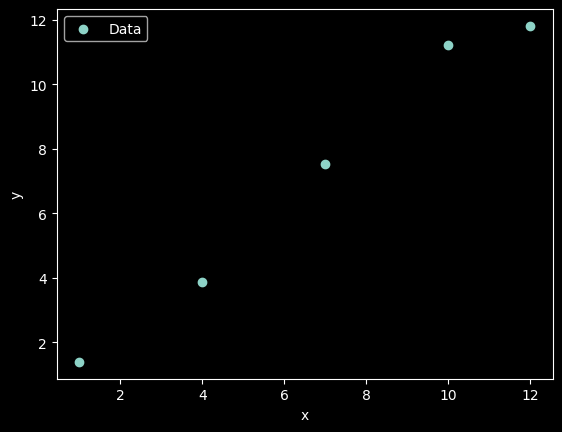

In [2]:
# Generate data
np.random.seed(42)
true_a = 1
x = np.array([1, 4, 7, 10, 12])

# True standard deviation of noise in measured y, only used in generating data
sigma_d_true = 0.8

# Guessed standard deviation of noise in measured y, only used in model
sigma_d = 1.0

# Guessed standard deviation of prior on a, only used in model
sigma_a = 1.0

y = true_a * x + np.random.normal(0, sigma_d_true, size=x.shape)

plt.scatter(x, y, label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [3]:
learning_rate = 0.01
iterations = 10000

# Initial guess
a = 0.0

# Gradient descent to find MAP estimate
for k in range(iterations):
    y_pred = a * x
    prior_a = np.mean(a**2) / sigma_a**2 # if prior_a is uniformly distributed, this becomes 1
    likelihood = np.mean((y_pred - y)**2) / sigma_d**2
    loss = prior_a + likelihood

    grad_prior_a = 2 * np.mean(a) / sigma_a**2
    grad_likelihood = 2 * np.mean((y_pred - y) * x) / sigma_d**2
    grad_loss = grad_prior_a + grad_likelihood

    a -= learning_rate * grad_loss

    if k % (iterations//10) == 0:
        print(f"Iteration {k}: loss = {loss:.4f}, a = {a:.4f}")

a_map = a
print(f"MAP estimate of a: {a_map:.4f}")

Iteration 0: loss = 67.7990, a = 1.2941
Iteration 1000: loss = 1.3456, a = 1.0270
Iteration 2000: loss = 1.3456, a = 1.0270
Iteration 3000: loss = 1.3456, a = 1.0270
Iteration 4000: loss = 1.3456, a = 1.0270
Iteration 5000: loss = 1.3456, a = 1.0270
Iteration 6000: loss = 1.3456, a = 1.0270
Iteration 7000: loss = 1.3456, a = 1.0270
Iteration 8000: loss = 1.3456, a = 1.0270
Iteration 9000: loss = 1.3456, a = 1.0270
MAP estimate of a: 1.0270


Other than computing second derivative analytically as shown above, we can also compute this numerically using finite difference method

$$f(a)=\frac{1}{2}\left[\sum_{i=0}^{m}\left(\frac{(y_{act,i}-ax_i)^2}{\sigma_D^2}\right)\right]+\frac{1}{2}\frac{a^2}{\sigma_a^2}$$

So the second derivative is

$$f^{"}(a)\approx \frac{\frac{f(a+h)-f(a)}{h}-\frac{f(a)-f(a-h)}{h}}{h}=\frac{f(a+h)-2f(a)+f(a-h)}{h^2}$$

In [4]:
# Compute second derivative
dda2_analytical = True

if dda2_analytical is True:
    # dda2 = 1 + 1 * np.sum(x**2)
    dda2 = 1 / sigma_a**2 + 1 * np.sum(x**2) / sigma_d**2

    posterior_std_a = np.sqrt(1/dda2)
    print(f"Posterior standard deviation of a: {posterior_std_a}")

else:
    h = 1e-7  # Small perturbation
    a_plus = a_map + h
    a_minus = a_map - h

    # Compute loss at perturbed points
    y_pred_plus = a_plus * x
    y_pred_minus = a_minus * x

    loss_plus = 0.5*(a_plus / sigma_a)**2 + 0.5*np.mean((y_pred_plus - y)**2) / sigma_d**2
    loss_minus = 0.5*(a_minus / sigma_a)**2 + 0.5*np.mean((y_pred_minus - y)**2) / sigma_d**2
    loss_map = 0.5*(a_map / sigma_a)**2 + 0.5*np.mean((a_map * x - y)**2) / sigma_d**2

    # Compute second derivative
    dda2_fd = (loss_plus - 2 * loss_map + loss_minus) / h**2

    posterior_std_a = np.sqrt(1 / dda2_fd)
    print(f"Posterior standard deviation of a (finite-difference, second-order): {posterior_std_a:.4f}")

Posterior standard deviation of a: 0.05670479771237427


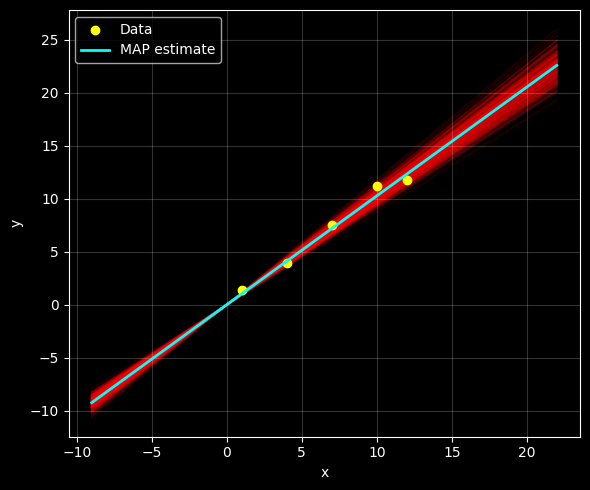

In [5]:
# Sample a
num_samples = 1000
samples = np.random.normal(a_map, posterior_std_a, num_samples)

fig_1, ax_1 = plt.subplots(figsize=(6, 5))

ax_1.scatter(x, y, label='Data', c='yellow')
ax_1.set_xlabel('x')
ax_1.set_ylabel('y')
ax_1.grid(alpha=0.2)

# Plot some sampled lines
x_test = np.linspace(x.min()-10, x.max()+10, 200)
for i in range(200):
    a_sample = samples[i]
    y_test = a_sample * x_test
    ax_1.plot(x_test, y_test, color='r', alpha=0.1, zorder=-10)

ax_1.plot(x_test, a_map * x_test, color='cyan', label='MAP estimate', linewidth=2)

ax_1.legend()
plt.tight_layout()
plt.show()

#### `Bayesian marginalization`

The above figure, while giving a feeling of model uncertainty, actually only describes the distribution of prediction `mean` corresponding to different $a$

To obtain full `predictive distribution` for each new $x_{\text{test}}$, we need to use `Bayesian marginalization`

$$\boxed{p(y|x_{\text{test}},D)=\int p(y|x_{\text{test}},a)p(a|D)da}$$

Essentially, this equation says that the final prediction distribution of $y$ given $x_{\text{test}}$, is the `integration` of all possible prediction `distributions` $p(y|x_{\text{test}},a)$, weighted by their respective `model probability` $p(a|D)$

One common numerical approach to tackle this integration is the Monte Carlo (MC) method

#### `Monte Carlo` integration

In essence, MC turns the integration into summation, by sampling from $p(a|D)$ which we knew how to do from early sections. If we can sample $a$ T times, getting $a_1, a_2, ..., a_T$, then this integration can be approximated as

$$\boxed{\frac{1}{T}\sum_{i=1}^{T}p(y|x_{\text{test}}, a_i)}$$

Recall that

$$y=ax+\epsilon$$

Therefore, each $p(y|x_{\text{test}}, a_i)$ is essentially

$$p(y|x_{\text{test}}, a_i)=\frac{1}{\sqrt{2\pi}\cdot \sigma_D}e^{-\frac{1}{2}\frac{(y-a_ix_{\text{test}})^2}{\sigma_D^2}}$$

That is, a `Gaussian distribution of y` centered at $a_ix_{\text{test}}$, with standard deviation of $\sigma_D$

#### One final thing

How can we `add` these Gaussian distributions numerically to complete the MC integration?

Once again, we will use sampling

When we get an $a_i$, sampled from $p(a|D)$, we can then sample a few points from the corresponding prediction distribution $p(y|x_{\text{test}}, a_i)$, and use these points to represent the distribution itself

When we pool together the sampled points from all prediction distributions $p(y|x_{\text{test}}, a_i), i=1,\cdots, T$, the pooled points represent the posterior distribution from Bayesian marginalization $p(y|x_{\text{test}},D)$ that we want, and we can plot this distribution for each $x_{test}$ to see the `model uncertainty` as reflected in its prediction

#### Implementation

In [6]:
# Generate new data points for prediction
posterior_mean_y = np.zeros(len(x_test))
posterior_std_y = np.zeros(len(x_test))

# Number of samples to draw from the predictive distribution (likelihood function at each x)
num_samples_per_predictive = 1

# For each x_test, compute the posterior predictive distribution
for i, x_ in enumerate(x_test): # for each x_...
    predictive_samples = [] # a list to collected samples sampled from likelihood functions at x_
    for a_sample in samples: # ....there will be summation of various likelihood functions corresponding to each sample of a
        # Predictive mean and variance for current a_sample, from likelihood function equation correspondin to a_sample and x_
        predictive_mean = a_sample * x_
        predictive_var = sigma_d**2
        # Use samples to represent the likelihood function
        individual_pred_dist = np.random.normal(predictive_mean, np.sqrt(predictive_var), num_samples_per_predictive)
        predictive_samples.extend(individual_pred_dist) # add samples from this likelihood function to list of collected samples

    # Compute the mean and std deviation of the predictive distribution for x_
    posterior_mean_y[i] = np.mean(predictive_samples)
    posterior_std_y[i] = np.std(predictive_samples)

For this particular problem, Bayesian marginalization has an analytical solution, which we can compare the numerical solution to

In [7]:
# Analytical posterior predictive mean and variance
posterior_mean_a = a_map

A_mat = 1 / sigma_a**2 + 1 * np.sum(x**2) / sigma_d**2

analytical_mean_y = x_test * posterior_mean_a
analytical_std_y = np.sqrt((x_test**2) /A_mat + sigma_d**2)

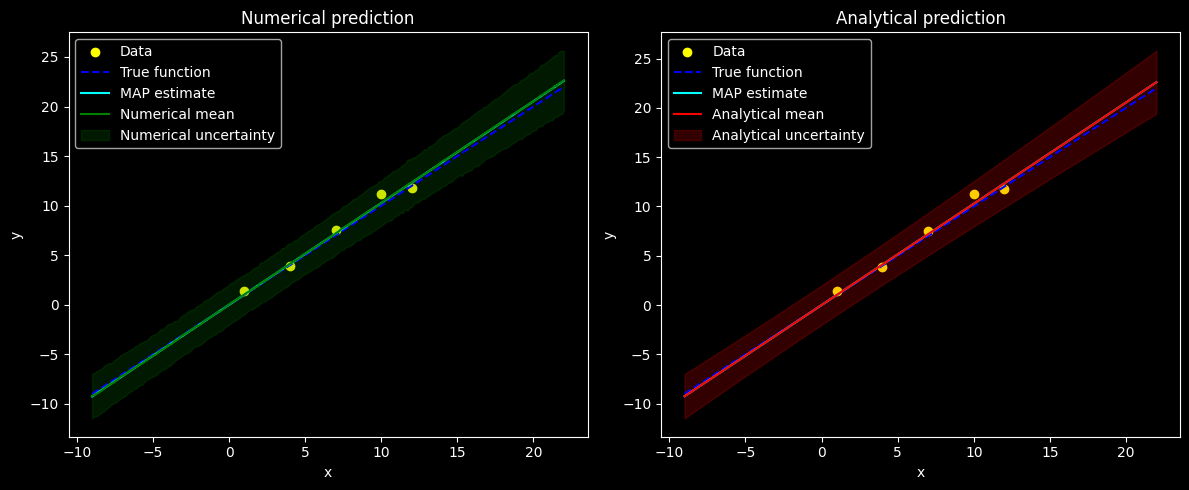

In [8]:
fig_2, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot numerical posterior mean and uncertainty
axes[0].scatter(x, y, label='Data', color='yellow')
axes[0].plot(x_test, true_a * x_test, label='True function', color='blue', linestyle='--')
axes[0].plot(x_test, a_map * x_test, label='MAP estimate', color='cyan', linestyle='-')
axes[0].plot(x_test, posterior_mean_y, label='Numerical mean', color='green')
axes[0].fill_between(x_test,
                posterior_mean_y - 2 * posterior_std_y,
                posterior_mean_y + 2 * posterior_std_y,
                color='green', alpha=0.2, label='Numerical uncertainty')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('Numerical prediction')
axes[0].legend(loc='upper left')

# Plot analytical posterior mean and uncertainty
axes[1].scatter(x, y, label='Data', color='yellow')
axes[1].plot(x_test, true_a * x_test, label='True function', color='blue', linestyle='--')
axes[1].plot(x_test, a_map * x_test, label='MAP estimate', color='cyan', linestyle='-')
axes[1].plot(x_test, analytical_mean_y, label='Analytical mean', color='red')
axes[1].fill_between(x_test,
                analytical_mean_y - 2 * analytical_std_y,
                analytical_mean_y + 2 * analytical_std_y,
                color='red', alpha=0.2, label='Analytical uncertainty')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('Analytical prediction')
axes[1].legend(loc='upper left')

plt.tight_layout()
plt.show()